In [11]:
# Import Packages 
import numpy as np
import matplotlib.pyplot as plt
# Set the seed for reproducibility
np.random.seed(37)

In [10]:
# Not useful can delete 
# Parameters

lambda_rate = 10 # lambda = 10 arrivals per minute 
mu1 = 0.1 # Mean of the lognormal distribution for s1
sigma1 = 0.1 # SD of the lognormal distribution for s1
n1 = 25 # Number of check-in stations

mean2 = 6 # Mean of the normal distribution for s2
std2 = 1 # SD of the normal distribution for s2

mu3 = 2 # Rate for the exponential distribution for s3
n3 = 10 # Number of staff at the security line

total_simulation_time = 24*60 # Total simulation time of the system is 24hours * 60mins

# Generate a random inter-arrival time
inter_arrival_time = np.random.exponential(1/lambda_rate)

# Generating service times at check-in (s1)
s1 = np.random.lognormal(mean=mu1, sigma=sigma1)

# Generating commute times to security line (s2)
s2 = np.random.normal(loc=mean2, scale=std2)
# Keep generating until a positive value is obtained
while s2 <= 0:
    s2 = np.random.normal(loc=mean2, scale=std2)

# Generating service times at security line (s3)
s3 = np.random.exponential(scale=1/mu3)

In [3]:
# Not useful can delete 
# Performance Measures of Simulation 

# L (averaged over time)
number_checkin = 0 # Number of people at the check-in station
number_commuting = 0 # Number of people commuting to the security lines
number_security = 0 # Number of people at the security station 
L = 0 # (number_checkin + number_commuting + number_security) / total_simulation_time

# W (averaged over people)
waiting_time_check = 0 # Waiting time at the check-in line
waiting_time_security = 0 # Waiting time at the security line
waiting_time = 0 # waiting_time_check + waiting_time_security
service_time_check = 0 # Service time at the check-in station
service_time_security = 0 # Service time at the security station
service_time = 0 # service_time_check + service_time_security
commute_time = 0
W = 0 # (waiting_time + service_time + commute_time) / number_completed

# S (averaged over time)
number_completed = 0 # Number of people complete the pre-boarding services and leave per minute 
S = 0 # number_completed / total_simulation_time

In [12]:
# Task1: understanding impact of arrival rate on performance measures 

In [ ]:
# Set range of lambda to test system stability 
lambda_rates = [5, 10, 15, 20]
L_values = []
W_values = []
S_values = []


In [64]:
import numpy as np

def printFEL(times, events):
    return list(zip(events, times))

def complex_simulation(lambda_rate=10, mu1=0.1, sigma1=0.1, mean2=6, std2=1, mu3=2, total_simulation_time=24*60, n1=25, n3=10):
    """
    Simulation of an airport pre-boarding system with check-in, commute, and security.
    Inputs:
        - lambda_rate: rate of arrivals (customers per minute)
        - mu1, sigma1: parameters for lognormal distribution at check-in
        - mean2, std2: parameters for normal distribution of commute times
        - mu3: rate for exponential distribution at security
        - total_simulation_time: total time to simulate (minutes)
        - n1, n3: number of staff at check-in and security, respectively
    Outputs:
        - numArr: number of arrivals
        - AvgTimeS: average time spent in system per customer
    """
    # State variables
    N1 = 0  # Number of people at check-in
    N2 = 0  # Number of people commuting
    N3 = 0  # Number of people at security
    t = 0  # Simulation time (minutes)
    FEL_time = [t + np.random.exponential(1/lambda_rate), total_simulation_time]
    FEL_eventType = ['A', 'E']

    # Metric tracking
    numArr = 0 # Total number of arrivals 
    TotalTimeS = 0 # Total time spent by all customers in the system
    departures_from_security = 0 # Total number of customers completing the pre-boarding services
    Debug = False  # Set to True to see detailed event log

    eventType = ''
    while eventType != 'E':
        if len(FEL_time) == 0:
            print('Error: FEL is empty. Ending simulation now')
            break

        nextEvent = np.argmin(FEL_time)
        eventTime = FEL_time.pop(nextEvent)
        eventType = FEL_eventType.pop(nextEvent)
        TotalTimeS += (N1 + N2 + N3) * (eventTime - t)
        t = eventTime

        # Arrival
        if eventType == 'A':
            N1 += 1
            numArr += 1
            FEL_time.append(t + np.random.exponential(1/lambda_rate))
            FEL_eventType.append('A')
            if N1 <= n1:  # If a check-in counter is available
                service_time = np.random.lognormal(mean=mu1, sigma=sigma1)
                FEL_time.append(t + service_time)
                FEL_eventType.append('D1')

        # Departure from check-in
        elif eventType == 'D1':
            N1 -= 1
            N2 += 1  # Customer now commuting
            if N1 >= n1:
                service_time = np.random.lognormal(mean=mu1, sigma=sigma1)
                FEL_time.append(t + service_time)
                FEL_eventType.append('D1')
            # Commute time to security
            commute_time = np.random.normal(loc=mean2, scale=std2)
            while commute_time <= 0:
                commute_time = np.random.normal(loc=mean2, scale=std2)
            FEL_time.append(t + commute_time)
            FEL_eventType.append('D2')

        # Arrival at security
        elif eventType == 'D2':
            N2 -= 1
            N3 += 1
            if N3 <= n3:  # If a security station is available
                service_time = np.random.exponential(1/mu3)
                FEL_time.append(t + service_time)
                FEL_eventType.append('D3')

        # Departure from security
        elif eventType == 'D3':
            N3 -= 1
            departures_from_security += 1
            if N3 >= n3:
                service_time = np.random.exponential(1/mu3)
                FEL_time.append(t + service_time)
                FEL_eventType.append('D3')

        if Debug:
            print(f"Event: {eventType}, Time: {eventTime:.2f}, N1 (Check-in): {N1}, N2 (Commuting): {N2}, N3 (Security): {N3}, NumArrivals: {numArr}, TotalTimeInSystem: {TotalTimeS:.2f}")
            # Optionally, you can also display the Future Event List (FEL) for more insights
            print("FEL:", printFEL(FEL_time, FEL_eventType))
            
    # Performance measures
    L = TotalTimeS / total_simulation_time  # Average number of people in system
    W = TotalTimeS / numArr if numArr > 0 else 0  # Average time spent per person
    S = departures_from_security / (total_simulation_time) 

    # Return the calculated values at the end of your function
    return numArr, L, W, S

In [65]:
def printFEL(FEL_time,FEL_eventType):
    strOutput=""
    for eventIndex in range(len(FEL_time)):
        strOutput += "("
        strOutput += str(FEL_eventType[eventIndex])
        strOutput += ","
        strOutput += "{:.2f}".format(FEL_time[eventIndex])
        strOutput += ") "
    return strOutput

In [156]:
# Assuming the complex_simulation function and printFEL function have been defined as shown previously

# Call the simulation with default parameters
lambda_rate = 10  # Customer arrival rate per minute
mu1 = 0.1  # Mean of the lognormal distribution for check-in service times
sigma1 = 0.1  # Standard deviation of the lognormal distribution for check-in service times
mean2 = 6  # Mean of the normal distribution for commute times
std2 = 1  # Standard deviation of the normal distribution for commute times
mu3 = 2  # Rate for the exponential distribution at security
total_simulation_time = 1440  # Total simulation time (24 hours * 60 minutes/hour)
n1 = 25  # Number of staff at check-in
n3 = 10  # Number of staff at security

# Run the simulation
numArrivals, L, W, S = complex_simulation(lambda_rate=lambda_rate, mu1=mu1, sigma1=sigma1, mean2=mean2, std2=std2, mu3=mu3, total_simulation_time=total_simulation_time, n1=n1, n3=10)

# Print the results
print(f"Number of Arrivals: {numArrivals}")
print(f"Average Number of Customers in System: {L:.2f}")
print(f"Average Time Spent in System per Customer: {W:.2f} minutes")
print(f"Average Number of Customers Leave the System: {S:.2f} per minutes")


Number of Arrivals: 14290
Average Number of Customers in System: 75.37
Average Time Spent in System per Customer: 7.60 minutes
Average Number of Customers Leave the System: 9.88 per minutes


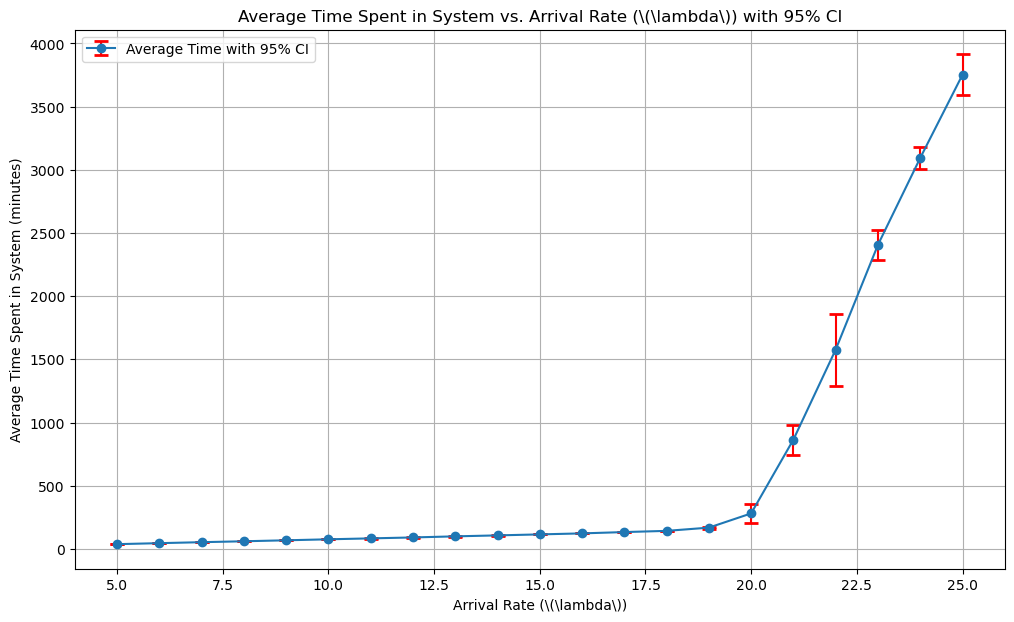

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Assuming the complex_simulation function is defined as before

def monte_carlo_simulation_lambda(lambda_rate, N_rep):
    L_list = []
    
    for _ in range(N_rep):
        numArr, L, W, S = complex_simulation(lambda_rate=lambda_rate, mu1=0.1, sigma1=0.1, mean2=6, std2=1, mu3=2, total_simulation_time=1440, n1=25, n3=10)
        L_list.append(L)
    
    # Calculate the mean and 95% confidence interval
    mean_time = np.mean(L_list)
    std_time = np.std(L_list, ddof=1)
    ci_95 = t.interval(0.95, len(L_list)-1, loc=mean_time, scale=std_time/np.sqrt(len(L_list)))
    
    return mean_time, ci_95

lambda_values = range(5, 26)  # Lambda from 5 to 25
N_rep = 5  # Number of replications
average_times = []
confidence_intervals = []

for lambda_rate in lambda_values:
    mean_time, ci_95 = monte_carlo_simulation_lambda(lambda_rate, N_rep)
    average_times.append(mean_time)
    confidence_intervals.append(ci_95)

# Plotting
plt.figure(figsize=(12, 7))
plt.errorbar(lambda_values, average_times, yerr=[(upper-lower)/2 for lower, upper in confidence_intervals], fmt='-o', ecolor='r', capsize=5, capthick=2, label='Average Time with 95% CI')
plt.title('Average Time Spent in System vs. Arrival Rate (\(\lambda\)) with 95% CI')
plt.xlabel('Arrival Rate (\(\lambda\))')
plt.ylabel('Average Time Spent in System (minutes)')
plt.legend()
plt.grid(True)
plt.show()


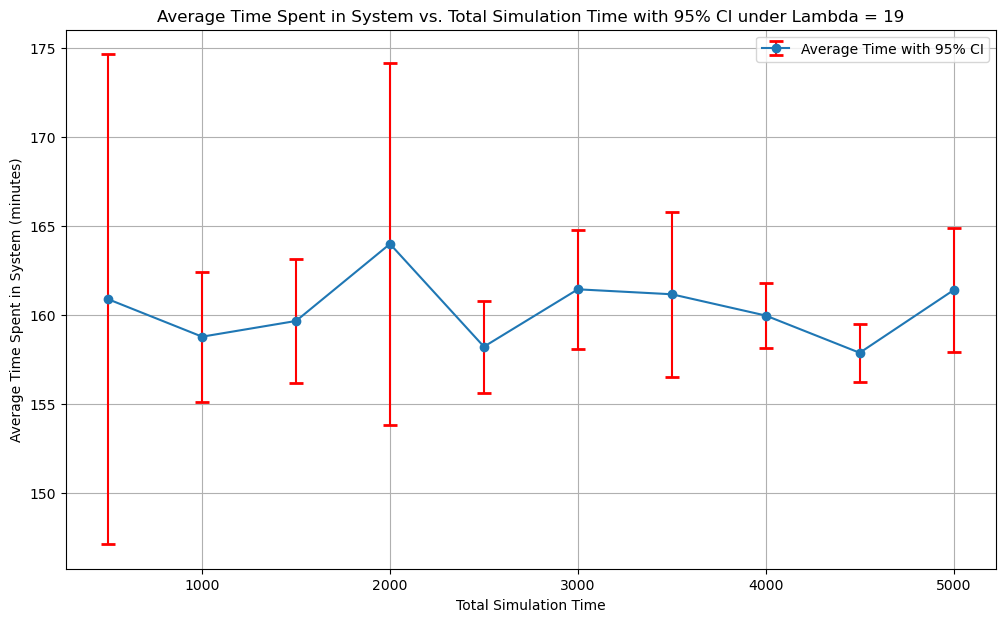

In [124]:
# Now we would like to observe how L evolves over labmda = 19, 20, and 21.

def monte_carlo_simulation(lambda_rate, total_simulation_time, N_rep):
    L_list = []
    
    for _ in range(N_rep):
        numArr, L, W, S = complex_simulation(lambda_rate=lambda_rate, mu1=0.1, sigma1=0.1, mean2=6, std2=1, mu3=2, total_simulation_time=total_simulation_time, n1=25, n3=10)
        L_list.append(L)
    
    # Calculate the mean and 95% confidence interval
    mean_time = np.mean(L_list)
    std_time = np.std(L_list, ddof=1)
    ci_95 = t.interval(0.95, len(L_list)-1, loc=mean_time, scale=std_time/np.sqrt(len(L_list)))
    
    return mean_time, ci_95

time_values = np.arange(500, 5001, 500) 
N_rep = 5  # Number of replications
average_times_19 = []
confidence_intervals_19 = []

for i in time_values:
    mean_time_19, ci_95_19 = monte_carlo_simulation(19, i , N_rep)
    average_times_19.append(mean_time_19)
    confidence_intervals_19.append(ci_95_19)

# Plotting
plt.figure(figsize=(12, 7))
plt.errorbar(time_values, average_times_19, yerr=[(upper-lower)/2 for lower, upper in confidence_intervals_19], fmt='-o', ecolor='r', capsize=5, capthick=2, label='Average Time with 95% CI')
plt.title('Average Time Spent in System vs. Total Simulation Time with 95% CI under Lambda = 19')
plt.xlabel('Total Simulation Time')
plt.ylabel('Average Time Spent in System (minutes)')
plt.legend()
plt.grid(True)
plt.show()

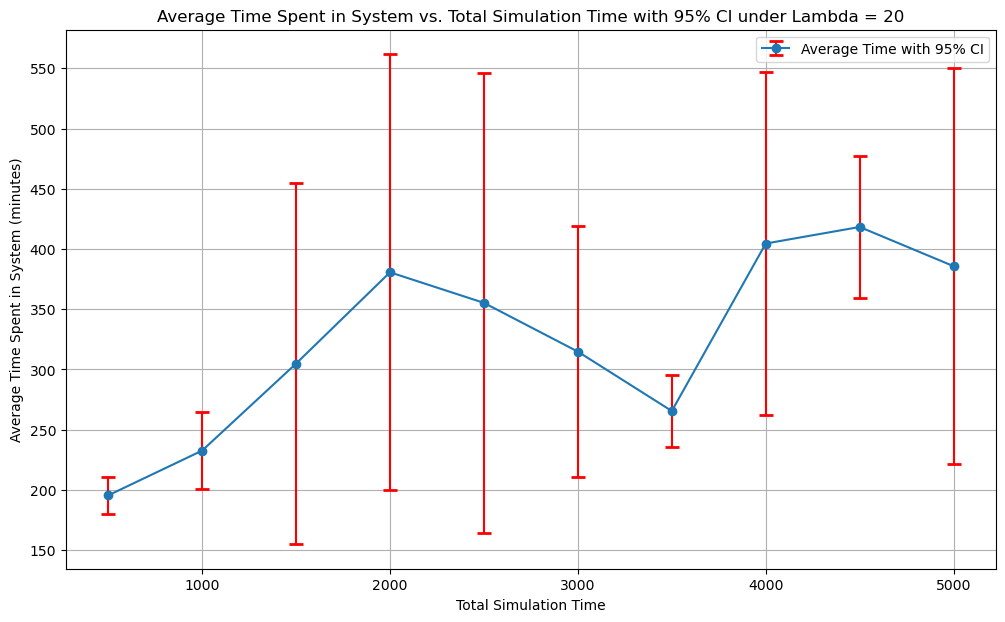

In [125]:
average_times_20 = []
confidence_intervals_20 = []

for i in time_values:
    mean_time_20, ci_95_20 = monte_carlo_simulation(20, i , N_rep)
    average_times_20.append(mean_time_20)
    confidence_intervals_20.append(ci_95_20)

# Plotting
plt.figure(figsize=(12, 7))
plt.errorbar(time_values, average_times_20, yerr=[(upper-lower)/2 for lower, upper in confidence_intervals_20], fmt='-o', ecolor='r', capsize=5, capthick=2, label='Average Time with 95% CI')
plt.title('Average Time Spent in System vs. Total Simulation Time with 95% CI under Lambda = 20')
plt.xlabel('Total Simulation Time')
plt.ylabel('Average Time Spent in System (minutes)')
plt.legend()
plt.grid(True)
plt.show()

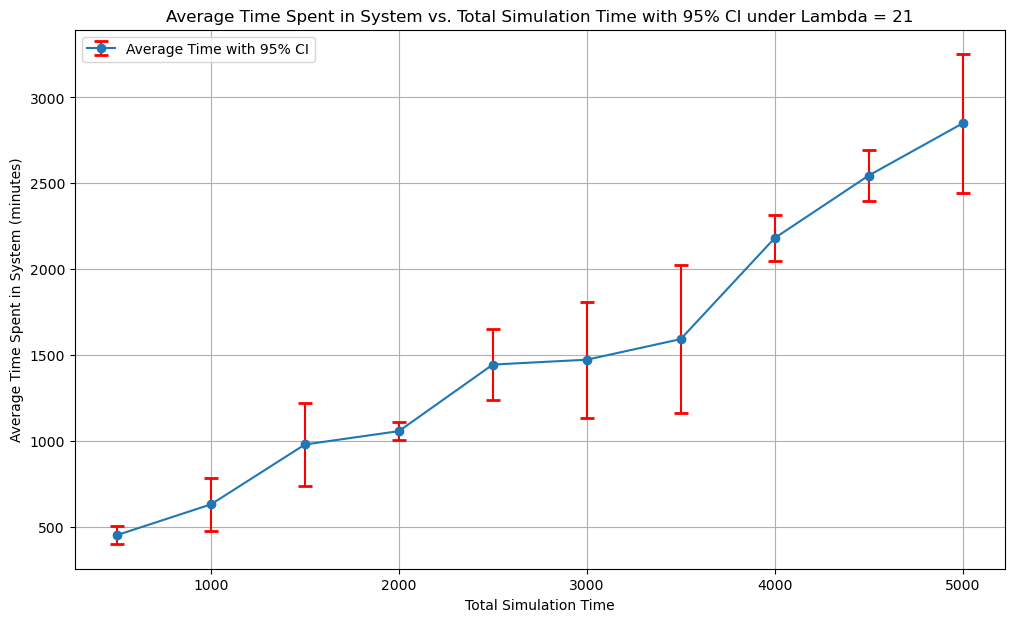

In [126]:
average_times_21 = []
confidence_intervals_21 = []

for i in time_values:
    mean_time_21, ci_95_21 = monte_carlo_simulation(21, i , N_rep)
    average_times_21.append(mean_time_21)
    confidence_intervals_21.append(ci_95_21)

# Plotting
plt.figure(figsize=(12, 7))
plt.errorbar(time_values, average_times_21, yerr=[(upper-lower)/2 for lower, upper in confidence_intervals_21], fmt='-o', ecolor='r', capsize=5, capthick=2, label='Average Time with 95% CI')
plt.title('Average Time Spent in System vs. Total Simulation Time with 95% CI under Lambda = 21')
plt.xlabel('Total Simulation Time')
plt.ylabel('Average Time Spent in System (minutes)')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
# From the graph, it is reasonable to say that the range of lambda such that the system is relatively stable is [0, 20]. 

In [140]:
def monte_carlo_simulation_L_over_W(lambda_rate, N_rep):
    LW_ratios = []
    
    for _ in range(N_rep):
        numArr, L, W, S = complex_simulation(lambda_rate=lambda_rate, mu1=0.1, sigma1=0.1, mean2=6, std2=1, mu3=2, total_simulation_time=1440, n1=25, n3=10)
        if W != 0:
            LW_ratios.append(L / W)
    
    # Calculate the mean and 95% confidence interval
    mean_ratios = np.mean(LW_ratios)
    std_ratios = np.std(LW_ratios, ddof=1)
    ci_95 = t.interval(0.95, len(LW_ratios)-1, loc=mean_ratios, scale=std_ratios/np.sqrt(len(LW_ratios)))
    
    return mean_ratios, ci_95

lambda_values = range(5, 26)  # Lambda from 5 to 25
N_rep = 5  # Number of replications
average_ratios = []
confidence_intervals = []

for lambda_rate in lambda_values:
    mean_ratios, ci_95 = monte_carlo_simulation_L_over_W(lambda_rate, N_rep)
    average_ratios.append(mean_ratios)
    confidence_intervals.append(ci_95)



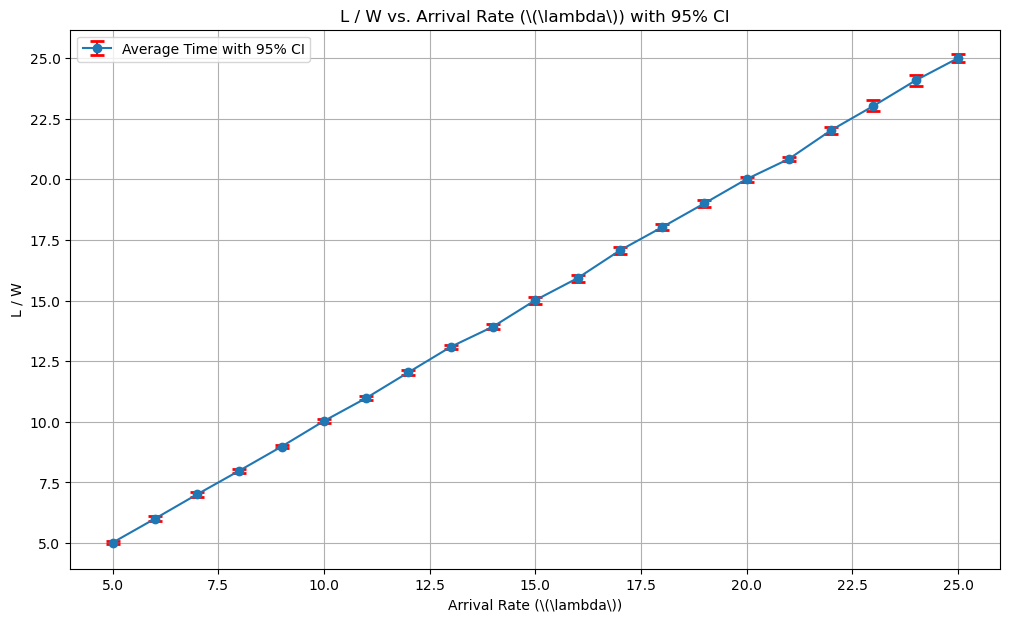

In [141]:
# Plotting
plt.figure(figsize=(12, 7))
plt.errorbar(lambda_values, average_ratios, yerr=[(upper-lower)/2 for lower, upper in confidence_intervals], fmt='-o', ecolor='r', capsize=5, capthick=2, label='Average Time with 95% CI')
plt.title('L / W vs. Arrival Rate (\(\lambda\)) with 95% CI')
plt.xlabel('Arrival Rate (\(\lambda\))')
plt.ylabel('L / W')
plt.legend()
plt.grid(True)
plt.show()

In [142]:
print(average_ratios / np.arange(5,26,1))

[1.00280556 0.99997685 1.00093254 0.99800347 0.99759259 1.00304167
 0.99809343 1.00325231 1.00696581 0.99445437 1.00082407 0.99521701
 1.00383987 1.00130401 1.00032164 1.0004375  0.99242725 1.00119318
 1.00112923 1.00335648 0.99988333]


In [136]:
print(average_ratios)

[37.969594441237334, 45.505648595793346, 53.5790529303578, 60.25818567181445, 67.52129780131634, 76.23503447476921, 83.99495759219155, 91.17516616998324, 98.52761410037719, 105.9661289037253, 114.83373005321457, 123.609422783055, 132.41504332141122, 142.93148855281493, 159.62631981825766, 334.6708657673382, 879.1593851959454, 1628.0738730280207, 2282.3292713270184, 3010.928752182571, 3794.368231318683]


In [143]:
# Task1: Optimizing number of luggage screening stations 

In [144]:
lambda_fixed = 10 # default arrival rate
h = 1 # per person host 
R = 1 # reward per monute per person for completing service
c = 10 # cost per minute of hiring one attendant

In [149]:
def monte_carlo_simulation_n3(lambda_fixed, n3, N_rep, h=1, R=1, c=10):
    L_list = []
    S_list = []
    cost_list = []
    for _ in range(N_rep):
        numArr, L, W, S = complex_simulation(lambda_rate=lambda_fixed, mu1=0.1, sigma1=0.1, mean2=6, std2=1, mu3=2, total_simulation_time=1440, n1=25, n3=n3)
        cost = h*L - R*S + c*n3
        L_list.append(L)
        S_list.append(S)
        cost_list.append(cost)
    # Calculate the mean and 95% confidence interval
    mean_cost = np.mean(cost_list)
    std_cost = np.std(cost_list, ddof=1)
    ci_95 = t.interval(0.95, len(L_list)-1, loc=mean_cost, scale=std_cost/np.sqrt(len(cost_list)))
    mean_S = np.mean(S_list)
    
    return mean_cost, ci_95, mean_S


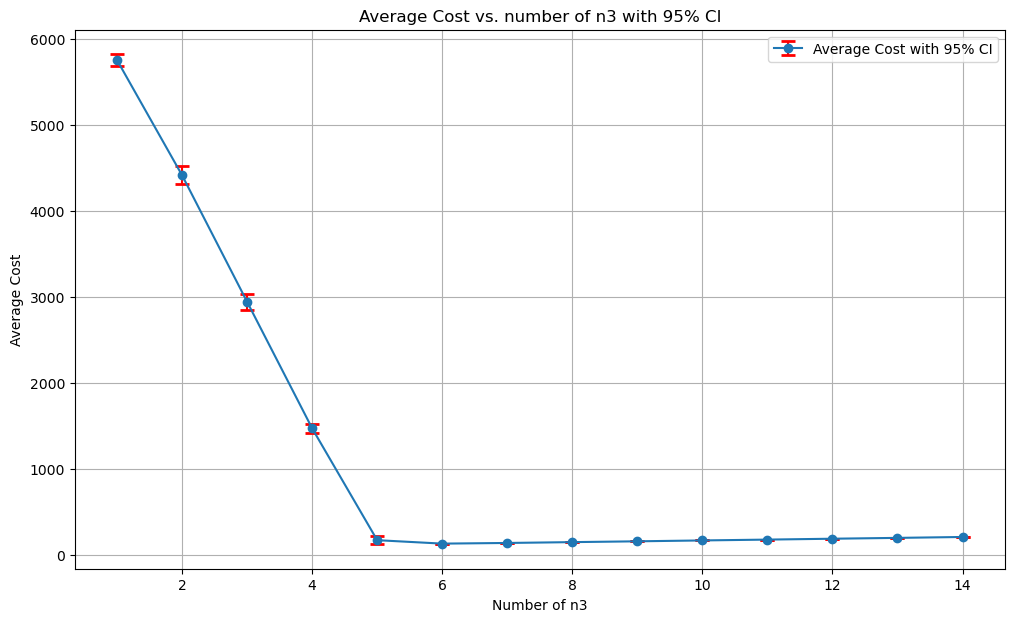

In [158]:
n3_values = range(1, 15)  # Lambda from 5 to 25
N_rep = 5  # Number of replications
average_cost = []
confidence_intervals = []
average_S = []

for n3_rate in n3_values:
    mean_cost, ci_95, mean_S = monte_carlo_simulation_n3(lambda_fixed, n3_rate, N_rep)
    average_cost.append(mean_cost)
    confidence_intervals.append(ci_95)
    average_S.append(mean_S)

# Plotting
plt.figure(figsize=(12, 7))
plt.errorbar(n3_values, average_cost, yerr=[(upper-lower)/2 for lower, upper in confidence_intervals], fmt='-o', ecolor='r', capsize=5, capthick=2, label='Average Cost with 95% CI')
plt.title('Average Cost vs. number of n3 with 95% CI')
plt.xlabel('Number of n3')
plt.ylabel('Average Cost')
plt.legend()
plt.grid(True)
plt.show()

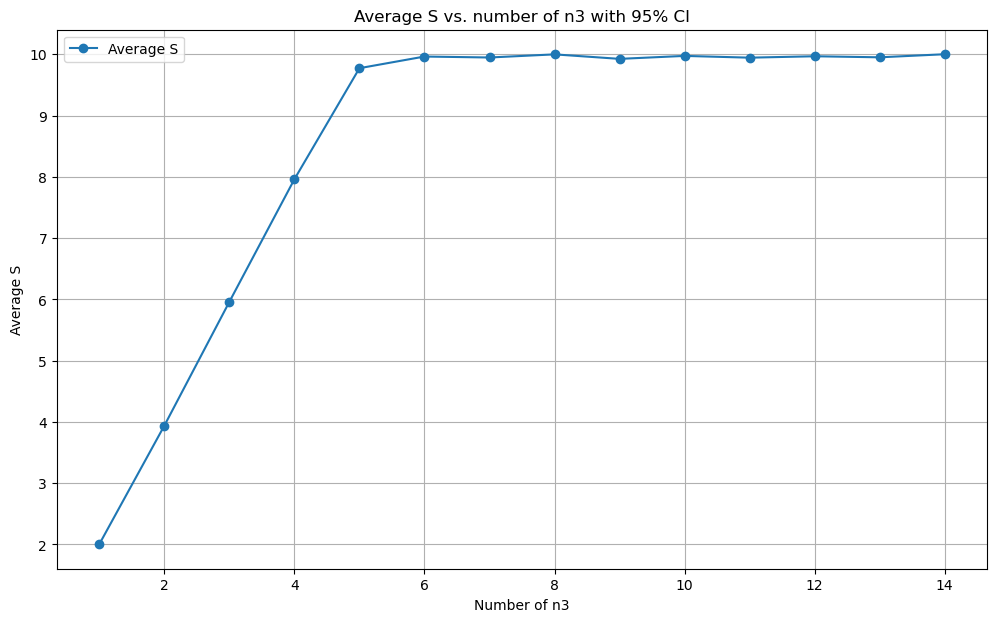

In [160]:
# How does S compare to lambda?
# Plotting
plt.figure(figsize=(12, 7))
plt.plot(n3_values, average_S, '-o', label='Average S')
plt.title('Average S vs. number of n3 with 95% CI')
plt.xlabel('Number of n3')
plt.ylabel('Average S')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
# since lambda is a fixed value, S/lambda increases and reach a stable value when n3 >= 6.

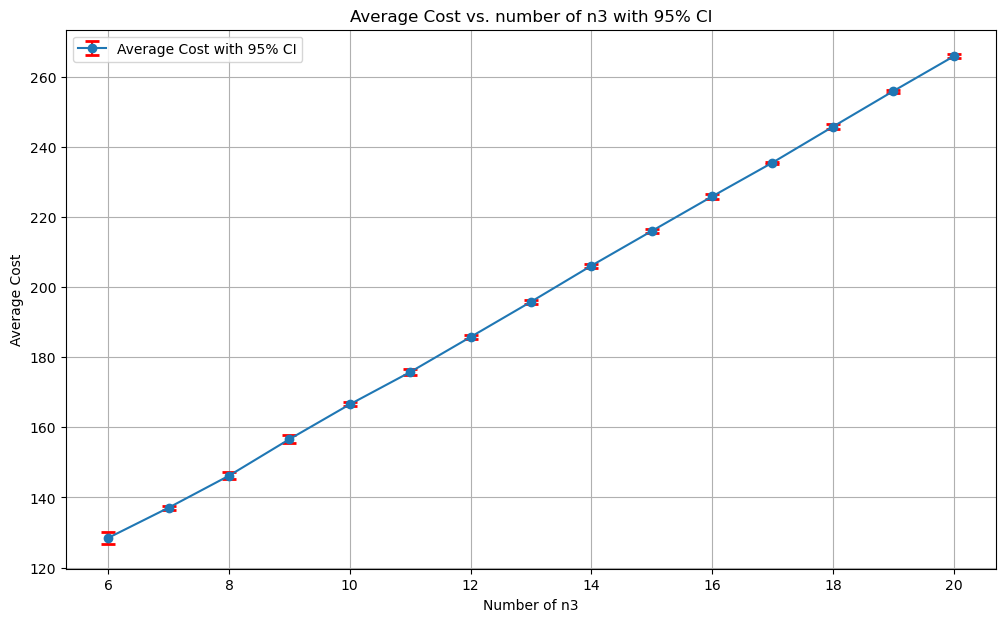

In [164]:
# What is the best n3?
n3_values_min = range(6, 21)
N_rep = 5  # Number of replications
average_cost = []
confidence_intervals = []
average_S = []

for n3_rate in n3_values_min:
    mean_cost, ci_95, mean_S = monte_carlo_simulation_n3(lambda_fixed, n3_rate, N_rep)
    average_cost.append(mean_cost)
    confidence_intervals.append(ci_95)
    average_S.append(mean_S)

# Plotting
plt.figure(figsize=(12, 7))
plt.errorbar(n3_values_min, average_cost, yerr=[(upper-lower)/2 for lower, upper in confidence_intervals], fmt='-o', ecolor='r', capsize=5, capthick=2, label='Average Cost with 95% CI')
plt.title('Average Cost vs. number of n3 with 95% CI')
plt.xlabel('Number of n3')
plt.ylabel('Average Cost')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# cost is minimized when n3 = 6.